In [3]:
import json, os
import numpy as np
import matplotlib.pyplot as plt
from legged_gym import LEGGED_GYM_ROOT_DIR
import seaborn as sns
import pandas as pd

In [ ]:
def plot_error_lineplots(list_infos, xlabel="Freq", ylabel="Power", names=["Metal"]):
  combined_df = []
  for j, list_info in tqdm(enumerate(list_infos)):
    sizes = [len(sample[0]) for sample in list_info]
    cutting_th = min(sizes)

    new_df = pd.DataFrame()
    subdf_n_average = []
    for xf, yf in list_info:
      xf, yf = xf[:cutting_th], yf[:cutting_th]
      data = {xlabel: xf.round(decimals=2),
              ylabel: yf}
      sub_df = pd.DataFrame(data)
      subdf_n_average.append(sub_df)
    new_df = pd.concat(subdf_n_average)
    new_df["Texture"] = names[j]
    combined_df.append(new_df)
  combined_df = pd.concat(combined_df)
  #Plot
  sns.set(style="whitegrid")
  sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
  sns.lineplot(x=xlabel, y=ylabel, data=combined_df, errorbar="sd", hue="Texture")
  print("Figure ready")
  
def plot_error_lineplots(list_infos, n_average, xlabel="episode_group_av", ylabel="rewards", names=["dqn", "ddqn", "ddqn2"]):
  sizes = [len(list_info) for list_info in list_infos]
  cutting_th = min(sizes)
  combined_df = []
  for j, list_info in enumerate(list_infos):
    list_info = list_info[:cutting_th]

    x = np.asarray(list_info)
    df = pd.DataFrame(list(zip(range(0, len(x)), x)), columns=['episode', 'info'])
    new_df = pd.DataFrame()
    subdf_n_average = []#n episodes will be one item here
    for i in range(len(x)-n_average+1):
      #print(df[i: i+n_average]["reward"].values)
      data = {xlabel: np.ones(n_average)*i,
              ylabel: df[i: i+n_average]["info"].values}
      sub_df = pd.DataFrame(data)
      subdf_n_average.append(sub_df)
    new_df = pd.concat(subdf_n_average)
    new_df["Model"] = names[j]
    combined_df.append(new_df)
  combined_df = pd.concat(combined_df)
  #Plot
  sns.set(style="darkgrid")
  sns.lineplot(x=xlabel, y=ylabel, data=combined_df, ci="sd", hue="Model")

0.05455050152444668
[1.0, 0.98, 0.44, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.64, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.94, 1.0, 0.96, 0.98, 1.0, 0.94, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 0.98, 1.0, 0.98, 0.86, 1.0, 1.0, 0.98, 0.98, 0.68, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 0.98, 0.58, 1.0, 0.98, 0.98, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 0.98, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 0.76, 1.0, 0.78, 1.0, 1.0, 1.0, 0.98, 1.0, 0.98, 1.0, 0.88, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 0.88, 1.0, 0.98, 0.98, 1.0, 0.98, 1.0, 0.98, 0.98, 1.0, 1.0, 0.82, 1.0, 1.0, 1.0, 0.84, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.96, 1.0, 0.9, 0.8, 1.0, 0.86, 1.0, 1.0, 0.78, 0.98, 1.0, 0.94, 0.96, 0.98, 1.0, 1.0, 0.88, 0.98, 1.0, 1.0, 1.0, 1.0, 0.98, 0.98, 1.0, 1.0, 1.0, 0.82, 1.0, 0.98, 1.0, 0.98, 1.0, 1.0, 1.0, 0.98, 1.0, 0.58, 0.38, 0.64, 0.96, 1.0, 1.0, 1.0, 0.52, 1.0, 0.92, 0.9, 0.84, 0.96, 0.94, 0.98, 1.0, 0.7

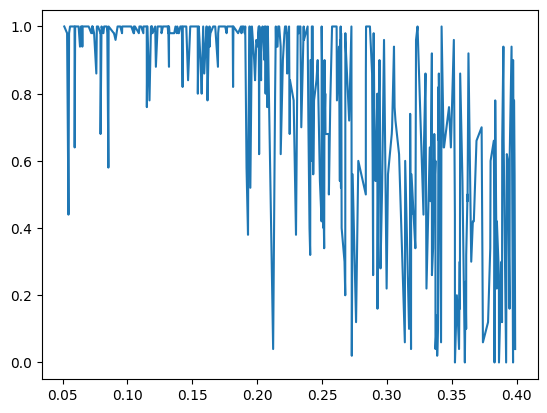

In [28]:
def myFunc(e):
  return e[metric]

fname = "discrete-None-0.75-0.075-False"
metric = "slope" if "slope" in fname else "height"
with open(os.path.join(LEGGED_GYM_ROOT_DIR, 'legged_gym', 'scripts',fname+'.json'), 'r') as file:
    data = json.load(file)  # Load and parse the JSON file

data.sort(key=myFunc)

accuracy = [item["successful"]/item["total"] for item in data]
slope = [item[metric] for item in data]
print(slope[accuracy.index(min(accuracy[:30]))])
print(accuracy)
plt.plot(slope, accuracy)
plt.show()

0.0555374349962947
0.96
0.9954000000000001


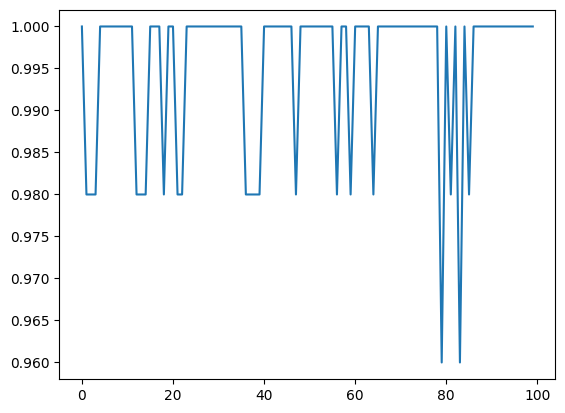

In [20]:
speed=0.5
fname = f"stairs-True-{str(speed)}-{str(speed/10)}-False"
metric = "slope" if "slope" in fname else "height"
with open(os.path.join(LEGGED_GYM_ROOT_DIR, 'legged_gym', 'scripts',fname+'.json'), 'r') as file:
    data = json.load(file)  # Load and parse the JSON file

data.sort(key=myFunc)

accuracy = [item["successful"]/item["total"] for item in data]
slope = [item[metric] for item in data]
print(slope[accuracy.index(min(accuracy[:100]))])
print(min(accuracy[:100]))
print(np.mean(accuracy))
plt.plot(accuracy)
plt.show()